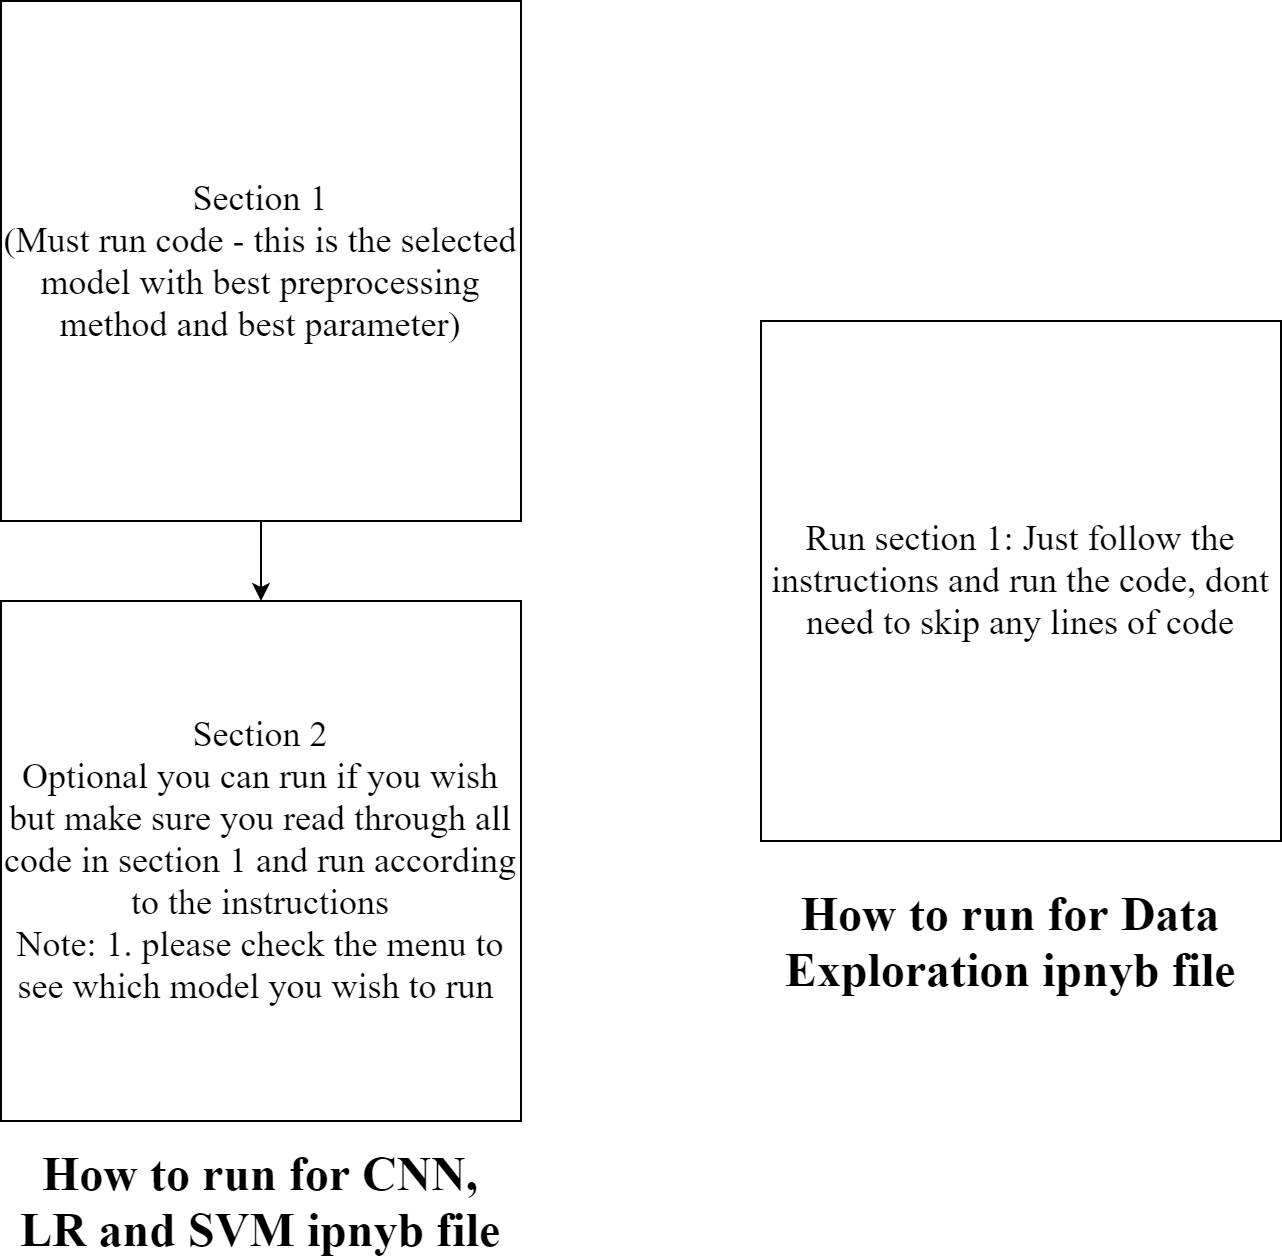

SECTION 1

Final/Choosen preprocessing and model paramters for Logistic Regression

IMPORT LIBRARIES

In [ ]:
##libraries
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:

# Download dataset of CIFAR-100 (Canadian Institute for Advanced Research)
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

In [ ]:
# Download dataset of CIFAR-100 
x_train, x_valid, y_train , y_valid = train_test_split(x_train, y_train, 
                                                    train_size=0.70, 
                                                    random_state=42,
                                                    stratify=y_train)

In [ ]:
#PRINT THE SHAPE OF ALL DATASET
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_valid.shape)
print(y_valid.shape)

(35000, 32, 32, 3)
(35000, 1)
(10000, 32, 32, 3)
(10000, 1)
(15000, 32, 32, 3)
(15000, 1)


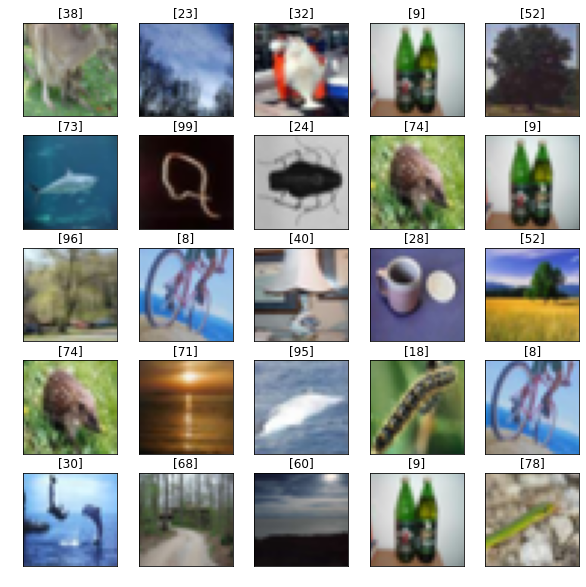

In [ ]:
# Show sample random image 5x5
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,100)
    cifar_image=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_num])
    # Erase the value of x tick and y tick
    plt.xticks(color="None")
    plt.yticks(color="None")
    # remove the tick x-axis and y-axis
    plt.tick_params(length=0)
    # print label
    plt.title(y_train[rand_num])
 
plt.show()

In [ ]:

#preprocess test dataset
#flipping image , add ZCA epsilon, ZCA whitening and image whitening
Datagenerator = ImageDataGenerator(featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=True, zca_epsilon=1e-06,rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=[0.2,1.0], shear_range=0.0, zoom_range=1.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
#apply the transformation
x_train1 = Datagenerator.apply_transform(x=x_train, transform_parameters={'flip_horizontal':True}) #flip image
x_test1 = Datagenerator.apply_transform(x=x_test, transform_parameters={'flip_horizontal':True})
x_valid1 = Datagenerator.apply_transform(x=x_valid, transform_parameters={'flip_horizontal':True})#flip image

#add back to original input image
x_train = np.concatenate((x_train,x_train1))
x_test = np.concatenate((x_test,x_test1))
x_valid = np.concatenate((x_valid,x_valid1))
#append the label twice because the transformed images is the same images just being flipped, it has the same index
y_train = np.concatenate((y_train,y_train))
y_test = np.concatenate((y_test,y_test))
y_valid = np.concatenate((y_valid,y_valid))

In [ ]:
%%time
# Normalize taining and test set image to the range of 0-1
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
x_valid = x_valid.astype('float32')/255.0

Wall time: 811 ms


In [ ]:
%%time
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
X_valid = x_valid.reshape(x_valid.shape[0],x_valid.shape[1]*x_valid.shape[2]*x_valid.shape[3])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

Wall time: 627 ms


In [ ]:
%%time
#reshape 4d image data in to 2d to fit into LR model
y_train = y_train.reshape(y_train.shape[0])
y_valid = y_valid.reshape(y_valid.shape[0])
y_test = y_test.reshape(y_test.shape[0])

Wall time: 0 ns


In [ ]:
#print the shape of dataset after reshaping it
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_valid.shape)
print(y_valid.shape)

Here is where the training begins

In [ ]:
%%time
# Creating the LR model
model = LogisticRegression()
ovr = OneVsRestClassifier(model)
   
# Fitting the model with training data
ovr.fit(X_train, y_train)   

# Making a prediction on the test set
prediction = ovr.predict(X_test)
   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")

Test Set Accuracy : 11.219999999999999 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.29      0.24      0.26       200
           1       0.11      0.18      0.14       200
           2       0.06      0.05      0.05       200
           3       0.03      0.03      0.03       200
           4       0.03      0.03      0.03       200
           5       0.09      0.06      0.07       200
           6       0.09      0.08      0.08       200
           7       0.15      0.14      0.14       200
           8       0.05      0.05      0.05       200
           9       0.22      0.28      0.24       200
          10       0.08      0.04      0.05       200
          11       0.09      0.10      0.09       200
          12       0.01      0.01      0.01       200
          13       0.05      0.05      0.05       200
          14       0.05      0.05      0.05       200
          15       0.04      0.03      0.04       200
          16

Here is for cross validation 

In [ ]:
%%time
# Grid search cross validation
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
#logreg=LogisticRegression()

#Gridsearch + Cross-Validation
logreg_cv=GridSearchCV(model,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_*100)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 18.425714285714285
Wall time: 2h 7min 9s


Get test score

In [ ]:
%%time
#test dataset GridSearch
#%%time
logreg2=LogisticRegression(C=1.0,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test)*100)

score 13.28
Wall time: 15min 15s


Get validation score

In [ ]:
%%time
#validation set GridSearch
#%%time
logreg3=LogisticRegression(C=1.0,penalty="l2")
logreg3.fit(X_train,y_train)
print("score",logreg3.score(X_valid,y_valid)*100)

score 13.54
Wall time: 13min 32s


confusion matrix - refer to data exploration ipnb file to understand the labels,, you can run cm[class_index] if you want to find out confusion matrix for a particular class

In [ ]:
%%time
np.set_printoptions(threshold=np.inf)
y_test_pred = logreg3.predict(X_test)

cm = confusion_matrix(y_test_pred, y_test)
print(cm)


[[ 48   4   6   0   0   4   2   2   0   0  14   2   0   0   0   4   2   0
    0   0   2   0   2   0   0   2   8   0   2   0   0   2   4   0   2   0
    2   0   0   0   0   2   0   0   0   4   0  12   0   0   2   4   0  28
    0   0   0   8   2   0   0   6   6   0   0   0   0   0   0   0   6   0
    0   0   2   0   0   0   2   0   0   0   0  14   2   0   0   0   2   6
    0   2   0   0   6   0   4   0   2   0]
 [  8  34   6   0   0   0   4   4   2   0   8   8   0   0  12  10   0   0
    8   4   2   0   2   2   0   2  10   2   0  10   0   0  12   4  10   2
    4   0   2   0   4   6   4   2   4   2   8   4   2   0   8  12   0   2
   10   0   0   6   0   0   0   2   0   6   4  12   8   2   0   0  16   0
    0  12  12   2   0  18   0   4   4   0   2   4   0   0   2   4   6   0
    0  18  14   6   0   0   2   6   2   2]
 [  0   0   8   0   0   2   2   0   2   2   0   8   0   2   0   0   0   0
    2   0   2   0   0   0   0   0   0   2   0   0   0   0   2   0   2   2
    8   0   2   0   2   0 

Plot roc curve

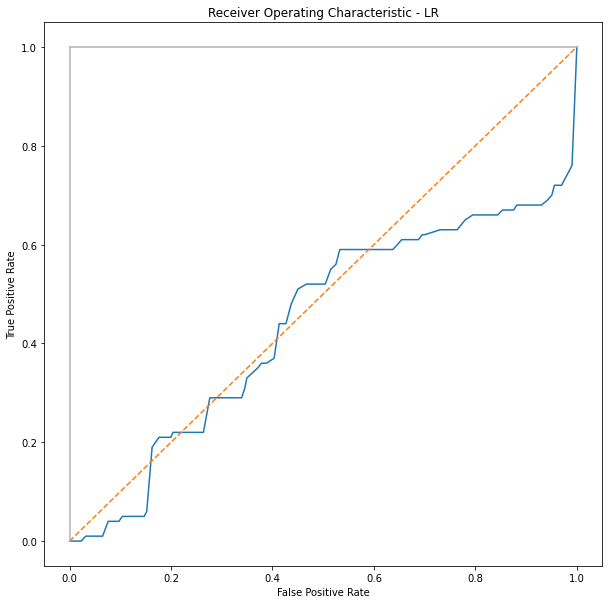

In [ ]:

y_score2 = logreg2.predict(X_test)

#false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2, pos_label=0)

    
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LR')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SECTION 2, this part the differences is using base preprocessing method, you can uncomment and run if you want to

MENU UNDER THIS SECTION
1. logistic regression with base preprocesing method the model parameter as the same as the seleted LR model

#This part is just using grid search cv - k 10 fold on the base preprocessing method - the one with zca epsilon za whitening and image whitening was choosen as the preprocessing method for Logistic regression since it gave better result but if you wish to run the code with base preprocessing please uncommment it

In [ ]:
# # Import train_test_split function
# from sklearn.model_selection import train_test_split

# #from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train , y_valid = train_test_split(x_train, y_train, 
#                                                     train_size=0.70, 
#                                                     random_state=42,
#                                                     stratify=y_train)

In [ ]:
# #flipping image
# #preprocess test dataset
# from keras.preprocessing.image import ImageDataGenerator
# Datagenerator = ImageDataGenerator()

# x_train1 = Datagenerator.apply_transform(x=x_train, transform_parameters={'flip_horizontal':True}) #flip image
# x_test1 = Datagenerator.apply_transform(x=x_test, transform_parameters={'flip_horizontal':True})
# x_valid1 = Datagenerator.apply_transform(x=x_valid, transform_parameters={'flip_horizontal':True})#flip image


# x_train = np.concatenate((x_train,x_train1))
# x_test = np.concatenate((x_test,x_test1))
# x_valid = np.concatenate((x_valid,x_valid1))
# y_train = np.concatenate((y_train,y_train))
# y_test = np.concatenate((y_test,y_test))
# y_valid = np.concatenate((y_valid,y_valid))

In [ ]:
# %%time
# # Normalize taining and test set image to the range of 0-1
# x_train = x_train.astype('float32')/255.0
# x_test = x_test.astype('float32')/255.0
# x_valid = x_valid.astype('float32')/255.0

CPU times: user 259 ms, sys: 413 ms, total: 672 ms
Wall time: 672 ms


In [ ]:
# %%time
# X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
# X_valid = x_valid.reshape(x_valid.shape[0],x_valid.shape[1]*x_valid.shape[2]*x_valid.shape[3])
# X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

CPU times: user 817 ms, sys: 403 ms, total: 1.22 s
Wall time: 1.22 s


In [ ]:
# %%time
# y_train = y_train.reshape(y_train.shape[0])
# y_valid = y_valid.reshape(y_valid.shape[0])
# y_test = y_test.reshape(y_test.shape[0])

CPU times: user 19 µs, sys: 5 µs, total: 24 µs
Wall time: 28.8 µs


In [ ]:
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
# print(x_valid.shape)
# print(y_valid.shape)

(70000, 32, 32, 3)
(70000,)
(20000, 32, 32, 3)
(20000,)
(30000, 32, 32, 3)
(30000,)


In [ ]:
# %%time
# # Creating the LR model
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# ovr = OneVsRestClassifier(model)
   
# # Fitting the model with training data
# ovr.fit(X_train, y_train)   

# # Making a prediction on the test set
# prediction = ovr.predict(X_test)
   
# # Evaluating the model
# print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
# print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")

Test Set Accuracy : 11.200000000000001 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.30      0.24      0.27       200
           1       0.10      0.15      0.12       200
           2       0.09      0.06      0.07       200
           3       0.04      0.04      0.04       200
           4       0.03      0.03      0.03       200
           5       0.08      0.06      0.07       200
           6       0.09      0.08      0.08       200
           7       0.12      0.13      0.13       200
           8       0.05      0.05      0.05       200
           9       0.22      0.28      0.25       200
          10       0.10      0.05      0.07       200
          11       0.07      0.07      0.07       200
          12       0.01      0.01      0.01       200
          13       0.04      0.04      0.04       200
          14       0.06      0.05      0.05       200
          15       0.06      0.05      0.06       200
          16

In [ ]:
# %%time
# # Grid search cross validation
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
# #logreg=LogisticRegression()

# #Gridsearch + Cross-Validation
# logreg_cv=GridSearchCV(model,grid,cv=10)
# logreg_cv.fit(X_train,y_train)

# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_*100)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 13.514285714285714
CPU times: user 12h 42min 20s, sys: 50min 23s, total: 13h 32min 44s
Wall time: 7h 5min 27s


In [ ]:
# #test dataset GridSearch
# #%%time
# logreg2=LogisticRegression(C=0.01,penalty="l2")
# logreg2.fit(X_train[:50000],y_train)
# score2 = logreg2.score(X_test[:10000],y_test[:10000])
# print("score", score2)

score 0.0084


In [ ]:
# print(X_test.shape)
# print(y_test.shape)

(20000, 3072)
(10000, 1)


In [ ]:
# print(X_valid.shape)
# print(y_valid.shape)

(30000, 3072)
(30000,)


In [ ]:
# #validation set GridSearch
# #%%time
# logreg3=LogisticRegression(C=0.01,penalty="l2")
# logreg3.fit(X_train[:50000],y_train)
# print("score",logreg3.score(X_valid,y_valid)*100)

score 0.95


In [ ]:
# import pandas as pd

# results1 = pd.DataFrame(logreg_cv.cv_results_)
# print(results1)
# results1.to_csv('results1.csv')

    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.187189      0.025062  ...             NaN                8
1      363.093949      9.125745  ...        0.004231                7
2        0.174790      0.006826  ...             NaN                9
3      359.388332      7.973596  ...        0.004180                1
4        0.172032      0.006621  ...             NaN               10
5      358.179539      6.891987  ...        0.002832                2
6        0.175764      0.005225  ...             NaN               11
7      356.123593      2.458538  ...        0.003628                5
8        0.177313      0.015629  ...             NaN               12
9      357.407357      7.227789  ...        0.003217                4
10       0.191756      0.048228  ...             NaN               13
11     358.152346      6.236584  ...        0.003496                3
12       0.193055      0.059246  ...             NaN               14
13     356.368374   